In [1013]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Generate input data

In [1014]:
import numpy as np
import matplotlib.pyplot as plt

In [1015]:
np.random.seed(42)

In [1016]:
x = 2 * np.random.randn(100,1)

In [1017]:
y = 4 + 3* x + np.random.randn(100,1)

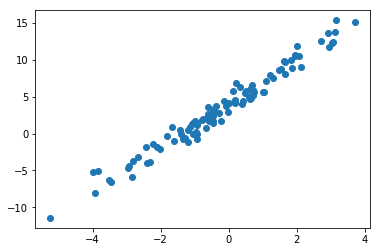

In [1018]:
plt.plot(x,y,'o')
plt.show()

### Calculating coefficients using batch gradient descent.

In [1019]:
x_ones = np.c_[np.ones((100,1)),x]

In [1020]:
x_ones

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009],
       [ 1.        , -0.92683539],
       [ 1.        , -0.93145951],
       [ 1.        ,  0.48392454],
       [ 1.        , -3.82656049],
       [ 1.        , -3.44983567],
       [ 1.        , -1.12457506],
       [ 1.        , -2.02566224],
       [ 1.        ,  0.62849467],
       [ 1.        , -1.81604815],
       [ 1.        , -2.8246074 ],
       [ 1.        ,  2.93129754],
       [ 1.        , -0.4515526 ],
       [ 1.        ,  0.13505641],
       [ 1.        , -2.84949637],
       [ 1.        , -1.08876545],
       [ 1.        ,  0.22184518],
       [ 1.        , -2.30198715],
       [ 1.        ,  0.75139604],
       [ 1.        ,

Initialize the values of learning rate and total number of iterations.

In [1021]:
eta = 0.1
n_epoch = 250

Initializing learning schedule hyperparameters.

In [1022]:
t_zero,t_one = 5,50

Defining learning schedule hyperparameter function.

In [1023]:
def learning_schedule(t):
    return t_zero/(t+t_one)

Randomly initializing coefficients values.

In [1024]:
coeffs = np.random.randn(2,1)
coeffs

array([[0.35778736],
       [0.56078453]])

In [1025]:
n=len(x_ones)

In [1026]:
for epoch in range(n_epoch):
    for i in range(n):
        random_index = np.random.randint(n)
        x_i = x_ones[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(coeffs) - y_i)
        eta = learning_schedule(epoch * n + i)
        coeffs = coeffs - eta * gradients


In [1027]:
coeffs

array([[4.02981994],
       [2.91040518]])

### Let's predict for new instances.

In [1028]:
x_new = np.array([[0],[2]])

In [1029]:
x_new

array([[0],
       [2]])

In [1030]:
x_new_ones = np.c_[np.ones((2,1)),x_new]

In [1031]:
x_new_ones

array([[1., 0.],
       [1., 2.]])

In [1032]:
y_predict = x_new_ones.dot(coeffs)

In [1033]:
y_predict

array([[4.02981994],
       [9.8506303 ]])

### Let's plot the predictions.

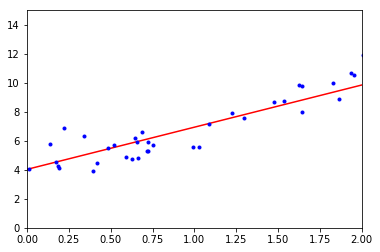

In [1034]:
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

---

### Let's use sklearn and check the coefficients

In [1035]:
from sklearn.linear_model import LinearRegression

In [1036]:
lin_reg = LinearRegression()

In [1037]:
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1038]:
lin_reg.intercept_,lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

The coefficients are exactly same.

### Let's predict using the fitted model and compare the values with the previous predictions

In [1039]:
new_instances = np.array([[0],[2]])

In [1040]:
lin_reg.predict(new_instances)

array([[4.00742783],
       [9.86417067]])

The predicted values are same as well.

---

### Linear regression using SGD with Scikit-Learn

In [1041]:
from sklearn.linear_model import SGDRegressor

In [1042]:
sgd_reg = SGDRegressor(max_iter=2000,tol = 1e-5,penalty=None,eta0=0.1,random_state=42,shuffle = False)

In [1043]:
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=2000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=False, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [1044]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.00868758]), array([2.89821404]))